In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('train.csv')

In [8]:
df.shape

(550068, 12)

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [37]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
18,1000007,P00036842,M,36-45,1,B,1,1,1,14.0,16.0,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8.0,14.0,11927
28,1000009,P00078742,M,26-35,17,C,0,0,5,8.0,14.0,5391
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,16352


Based on the observed outcomes, it's evident that both Product_Category_2 and Product_Category_3 contain some missing values.

## Data Cleaning 

In [18]:
pd.isnull(df).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [22]:
pd.isnull(df).sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

Successfully cleaned null values from the dataset

In [26]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [43]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,6.896871,12.668243,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,4.500288,4.125338,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,2.000000,9.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,6.000000,14.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,10.000000,16.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,16.000000,18.000000,23959.000000


# Gender

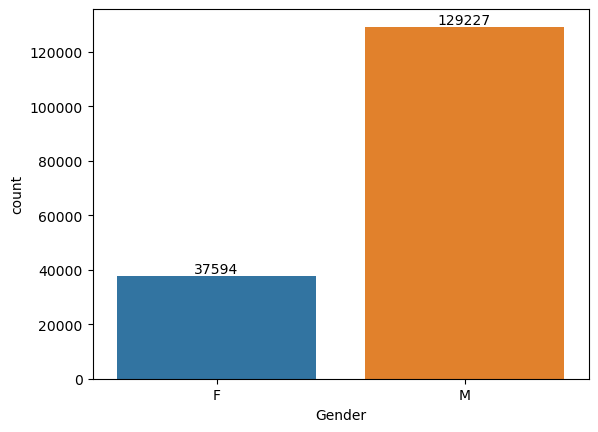

In [71]:
ax = sns.countplot(x='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

From this visulization, i can see that more than half of the buyers are male.

In [32]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

  Gender    Purchase
0      F   416719106
1      M  1528099293


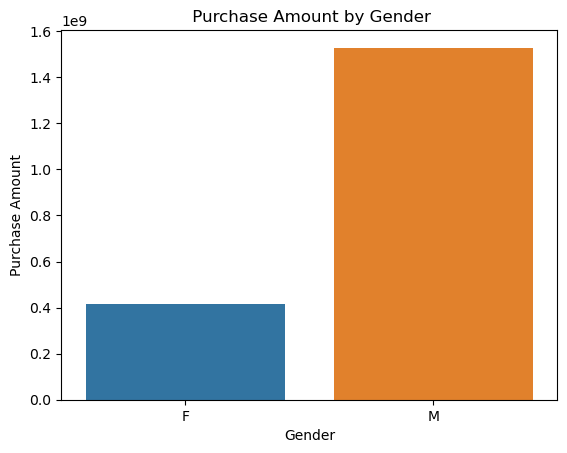

In [246]:
sales_gender = df.groupby(['Gender'],as_index=False)['Purchase'].sum().sort_values(by=['Purchase'])
print(sales_gender)
sns.barplot(x='Gender',y='Purchase',data=sales_gender)
plt.title(' Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

From above, males purchased more product than females during black friday sales.

## Occupation

    Occupation   Purchase
8            8    6432407
9            9   20397430
18          18   23422830
13          13   24167287
19          19   26592051
11          11   38241744
5            5   45906022
15          15   47923272
10          10   48513523
3            3   58078326
6            6   68524749
2            2   85376522
16          16   87152898
14          14  100516186
20          20  103025101
12          12  126963657
1            1  151552394
17          17  170827574
7            7  211461594
0            0  240680898
4            4  259061934


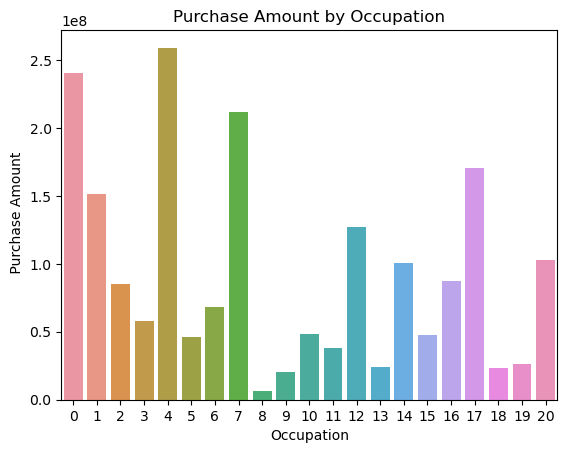

In [248]:
sales_occupation = df.groupby(['Occupation'],as_index=False)['Purchase'].sum().sort_values(by=['Purchase'])
print(sales_occupation)
sns.barplot(x='Occupation',y='Purchase',data=sales_occupation)
plt.title('Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel(' Purchase Amount')
plt.show()

The graph clearly indicates that individuals in occupation category 4 are the most inclined to make purchases, whereas those in category 8 are the least likely to do so.

## Marital Status

In [94]:
marital_purchase_avg = df.groupby('Marital_Status')['Purchase'].mean()
print(marital_purchase_avg)

Marital_Status
0    11638.899065
1    11686.600295
Name: Purchase, dtype: float64


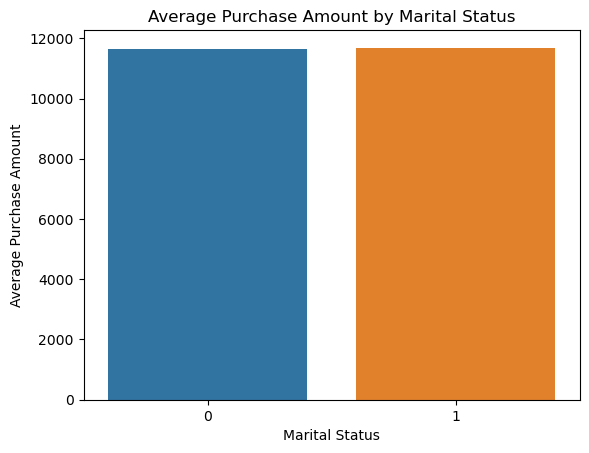

In [105]:
sns.barplot(x=marital_purchase_avg.index, y=marital_purchase_avg.values)
plt.title('Average Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Purchase Amount')
plt.show()

The analysis indicates that the values of the purchase orders are marginally greater than those of the individual.

## Age

In [123]:
purchase_summary = df.groupby(['Gender', 'Age']).agg({'Purchase': ['mean', 'sum', 'count']}).reset_index()
purchase_summary.columns = ['Gender', 'Age', 'Average_Purchase', 'Total_Purchase', 'Purchase_Count']
print(purchase_summary)

   Gender    Age  Average_Purchase  Total_Purchase  Purchase_Count
0       F   0-17      10563.799618        16606293            1572
1       F  18-25      10649.285714        75364995            7077
2       F  26-35      11121.132071       151569909           13629
3       F  36-45      11306.631218        89096254            7880
4       F  46-50      11202.366914        40698199            3633
5       F  51-55      11435.320732        28736961            2513
6       F    55+      11353.872093        14646495            1290
7       M   0-17      11462.166313        37836611            3301
8       M  18-25      11852.847518       287301171           24239
9       M  26-35      11737.797554       625777201           53313
10      M  36-45      11860.485731       301315640           25405
11      M  46-50      11836.140335       115295843            9741
12      M  51-55      12209.809315       105651480            8653
13      M    55+      12004.666011        54921347            

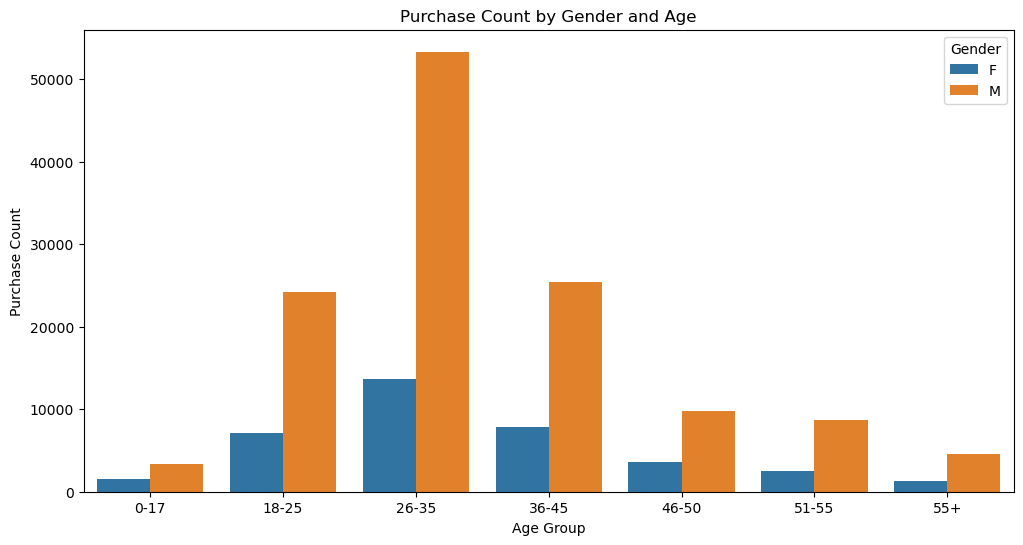

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Purchase_Count', hue='Gender', data=purchase_summary)
plt.title('Purchase Count by Gender and Age')
plt.xlabel('Age Group')
plt.ylabel('Purchase Count')
plt.legend(title='Gender')
plt.show()

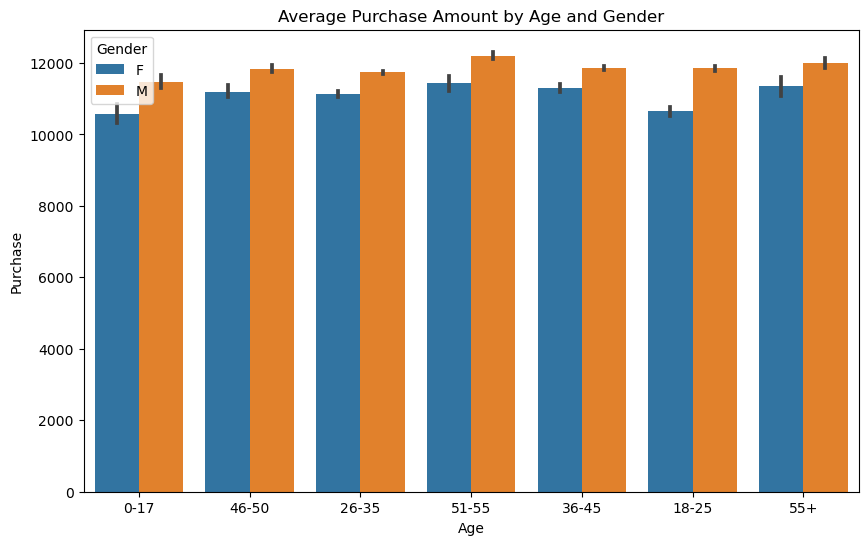

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title('Average Purchase Amount by Age and Gender')
plt.show()


Based on the analysis provided, it is observed that the highest purchase counts are recorded in the 26-35 age group for both males and females. However, when considering the total amount spent on purchases, males in the 51-55 age group and females aged 51 and above are the highest spenders.

## City 

In [130]:

city_stats = df.groupby('City_Category')['Purchase'].agg(['sum', 'mean', 'count']).reset_index()
city_stats.columns = ['City_Category', 'Total_Purchase', 'Average_Purchase', 'Purchase_Count']
print(city_stats)


  City_Category  Total_Purchase  Average_Purchase  Purchase_Count
0             A       465007352      11199.868783           41519
1             B       795469852      11488.090522           69243
2             C       684341195      12207.516991           56059


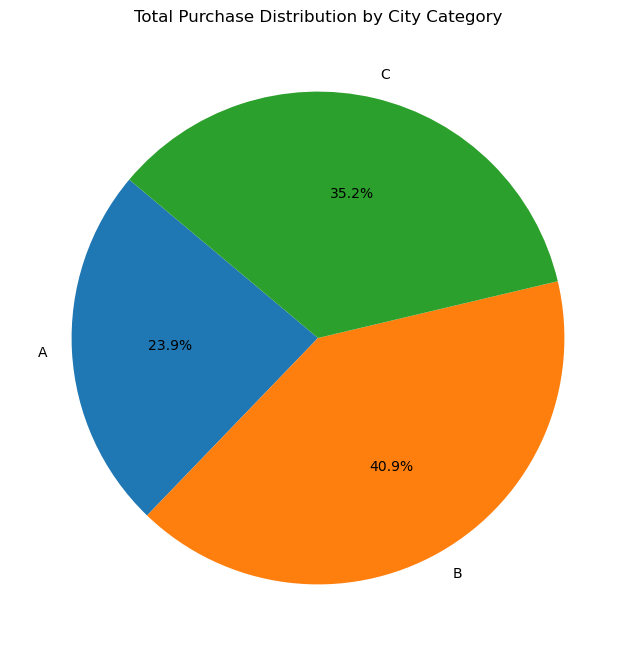

In [133]:
plt.figure(figsize=(8, 8))
plt.pie(city_stats['Total_Purchase'], labels=city_stats['City_Category'], autopct='%1.1f%%', startangle=140)
plt.title('Total Purchase Distribution by City Category')
plt.show()

/tmp/ipykernel_125/1500888728.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='City_Category', y='Purchase', hue='Occupation', data=df, ci=None)


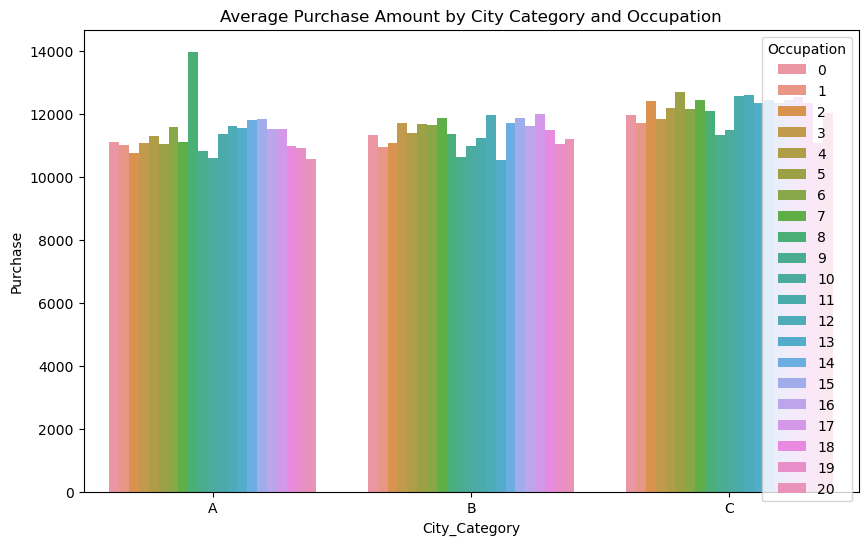

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City_Category', y='Purchase', hue='Occupation', data=df, ci=None)  
plt.title('Average Purchase Amount by City Category and Occupation')
plt.show()

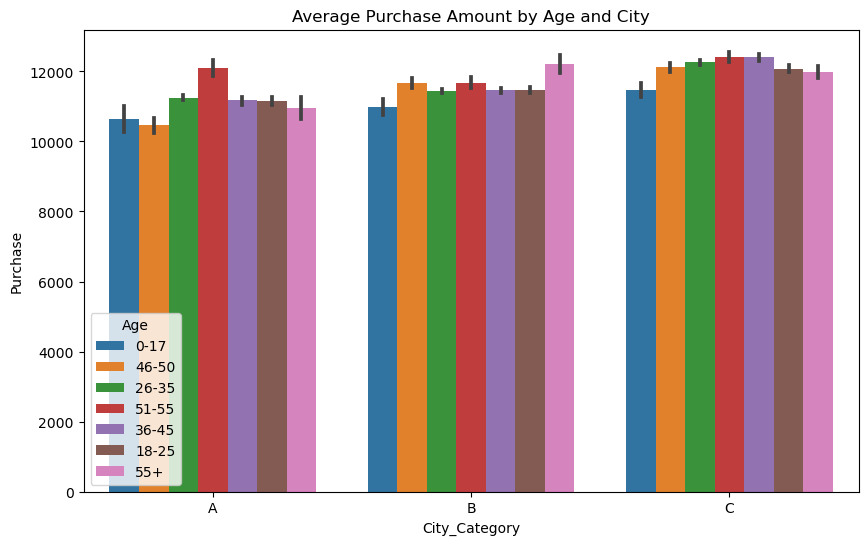

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(x='City_Category', y='Purchase', hue='Age', data=df)
plt.title('Average Purchase Amount by Age and City')
plt.show()

Based on the analysis, it was found that City Category B has the highest purchase volume in the age group of 55 and above. In City Category A, the leading group is those aged 51-55 who are in occupation category 8. For City Category C, the predominant age groups for purchases are 36-45 and 51-55.

## Product Categories

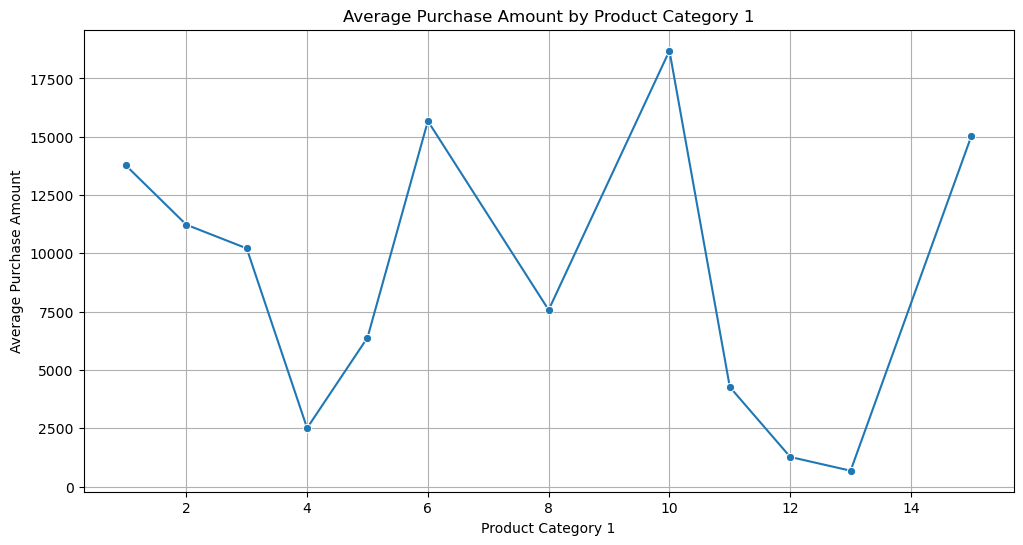

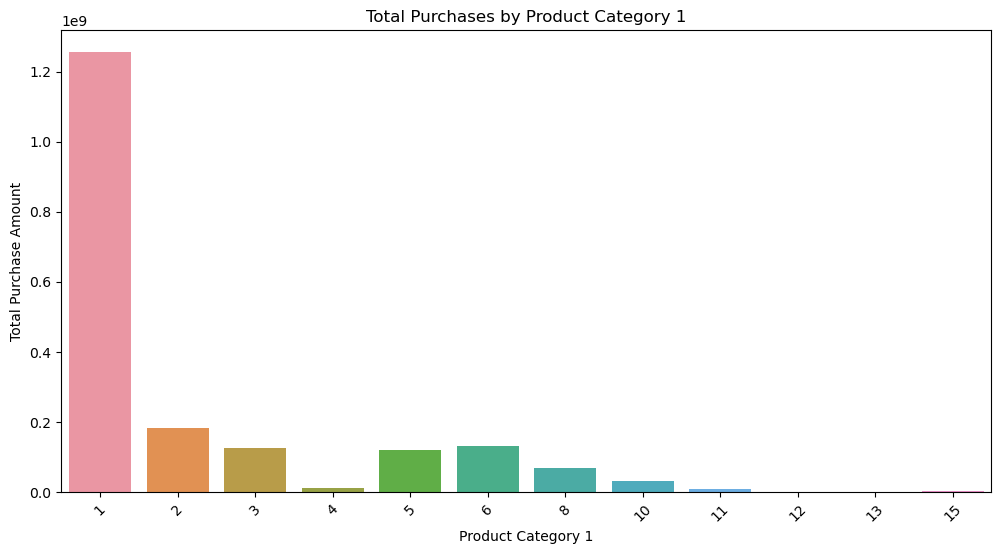

In [238]:
product_category_avg = df.groupby('Product_Category_1')['Purchase'].mean().reset_index()
product_category_avg = product_category_avg.sort_values('Product_Category_1')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Product_Category_1', y='Purchase', data=product_category_avg, marker='o')
plt.title('Average Purchase Amount by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

product_category_sum = df.groupby('Product_Category_1')['Purchase'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sum.index, y=product_category_sum.values)
plt.title('Total Purchases by Product Category 1')
plt.xlabel('Product Category 1')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

The highest quantity of purchases was made for Product 1, while Product 10 boasts the highest average purchase amount, surpassing that of Product 13.

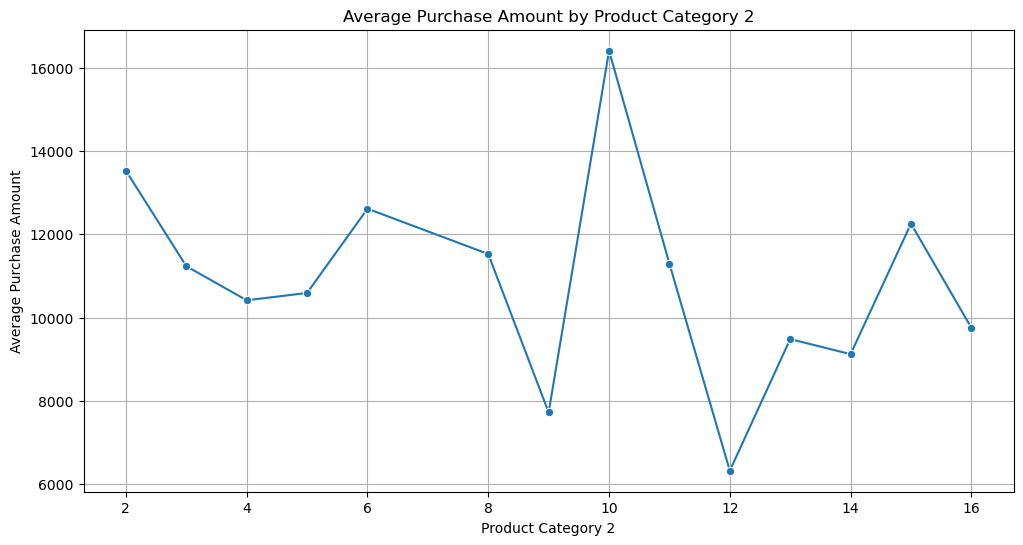

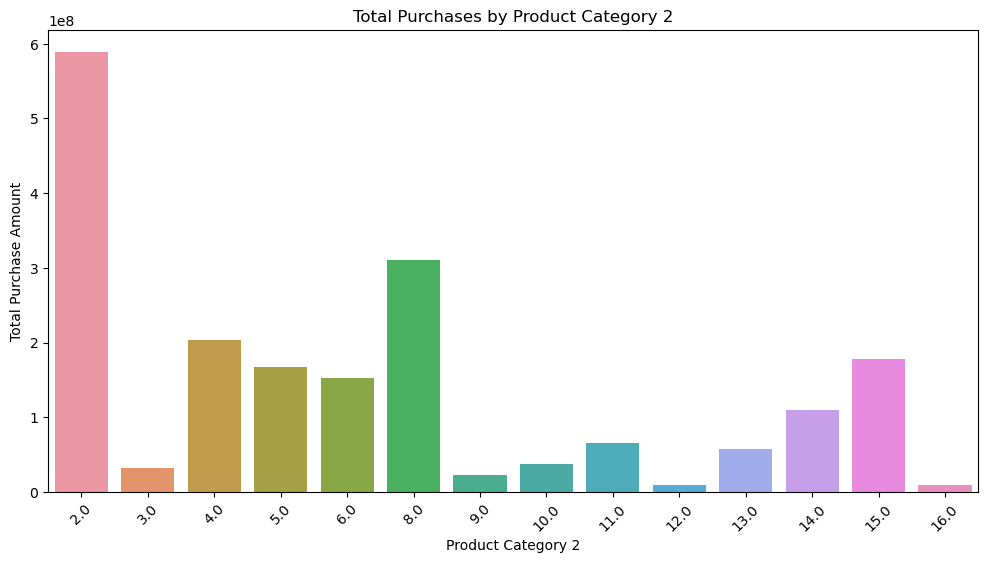

In [218]:
product_category_avg = df.groupby('Product_Category_2')['Purchase'].mean().reset_index()
product_category_avg = product_category_avg.sort_values('Product_Category_2')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Product_Category_2', y='Purchase', data=product_category_avg, marker='o')
plt.title('Average Purchase Amount by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

product_category_sum = df.groupby('Product_Category_2')['Purchase'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sum.index, y=product_category_sum.values)
plt.title('Total Purchases by Product Category 2')
plt.xlabel('Product Category 2')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

The highest quantity of purchases is attributed to Product 2, whereas Product 10 boasts the highest average purchase amount, with Product 12 having the lowest.

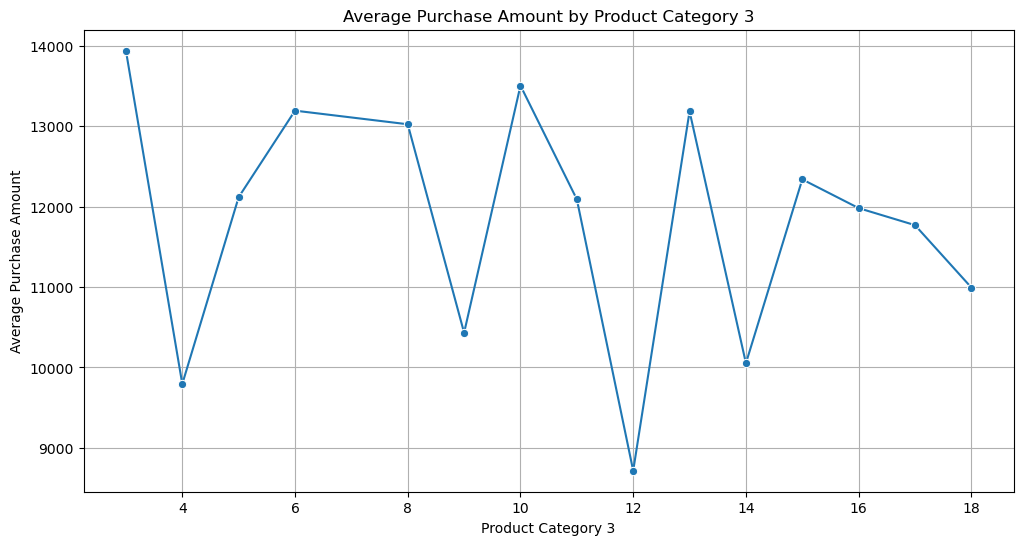

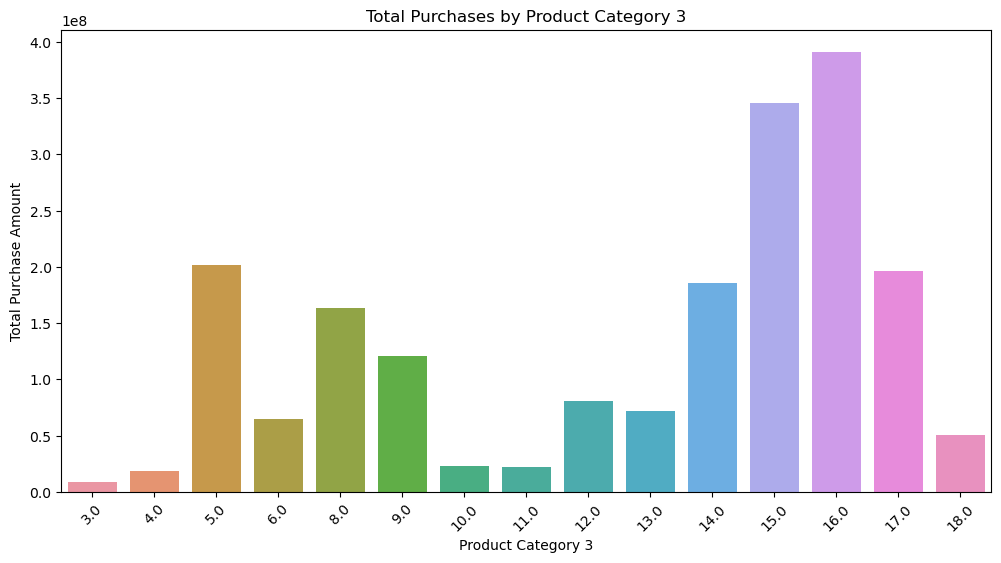

In [257]:
product_category_avg = df.groupby('Product_Category_3')['Purchase'].mean().reset_index()
product_category_avg = product_category_avg.sort_values('Product_Category_3')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Product_Category_3', y='Purchase', data=product_category_avg, marker='o')
plt.title('Average Purchase Amount by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

product_category_sum = df.groupby('Product_Category_3')['Purchase'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sum.index, y=product_category_sum.values)
plt.title('Total Purchases by Product Category 3')
plt.xlabel('Product Category 3')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

The total quantity of purchases is highest for Product 16, while Product 3 holds the record for the highest average purchase amount. Conversely, Product 12 has the lowest average purchase amount.

## Conclusion

During Black Friday sales, despite strong engagement from males and the 26-35 age group, there exists a notable disparity in participation among females and other age demographics, indicating a potential untapped market for retailers. While occupation category 4 and City Category B exhibit robust purchasing trends, the underperformance of occupation category 8 and varying engagement across city categories underscore the necessity for targeted marketing enhancements. Additionally, while Products 1 and 10 enjoy popularity, the lackluster performance of Products 12 and others suggests the need for diversified product strategies to cater to diverse consumer segments and maximize sales potential.